In [100]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd

import scipy
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [136]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()


start_t = time.time()
data_year = 2018
pdgId = 13
category = 0


if data_year == 2016:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
elif data_year == 2017:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
elif data_year == 2018:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
elif data_year == 'full':
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data2018/v4/v4/normalized/'

else:
    print("DATA YEAR IS WRONG")
    raise NameError('DATA YEAR IS WRONG')
mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/'



if category == 0:
    if data_year == 2016:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (5.632467289+2.572903489+1.685313225+3.988453305+3.068943620+3.527270568+8.609721915)*1000 #29.085073411
    elif data_year == 2017:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (4.738190514+4.145487893+ 9.295575564+2.603562425) * 1000 #20.782816396
 
    elif data_year == 2018:
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'

        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
        lumi = (13.954129666 + 6.941561868 + 3.227904890 + 31.312400879) * 1000 #55.435997303
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018AB-HighMET-17Sep2018_goodLumi.root'
#         lumi = (13.954129666 + 6.941561868 ) * 1000 #AB
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018CD-HighMET-17Sep2018_goodLumi.root'
#         lumi = (3.227904890 + 31.312400879) * 1000 #CD
    else: #2016, 2017, 2018AB
        fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2016_Data2017_Data2018-HighMET_goodLumi.root'

        lumi = (29.085073411 + 20.782816396+55.435997303)* 1000


elif category == 1:
    fpath_bkg['mc'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v3/v5/normalized/WH_HToSSTobbbb_ms55_pl10000_1pb_weighted.root'

#     if pdgId == 13:
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_SingleMuon_17Sept2018_Run2018D-ZMu-PromptReco-v2.root'
#     else:
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_EGamma_17Sept2018_Run2018D-ZElectron-PromptReco-v2.root'
    lumi = 31.34*1000
else:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v2/v3/normalized/'
    mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIISummer16/v1/v2/signals/normalized/'
    fpath_bkg['mc'] = mc_path + 'ZH_HToSSTobbbb_ms55_pl1000_1pb_weighted.root'
    fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_SingleMuon_17Sept2018_Run2018D-ZMu-PromptReco-v2_goodLumi.root'
    lumi = 29.516263349*1000

NEvents = {}
print(data_year, lumi/1000)
NEvents_genweight = {}
for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
#     if k[:7] == 'ntuples':
#         tree_bkg[k] = root_dir['ntuples']['llp']
#         NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     else:
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    NEvents_genweight[k] = root_dir['NEvents_genweight'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k])
    print("NEvents_genweight",NEvents_genweight[k])


    print ('weights',np.unique(a)*lumi)
    print(np.sum(a))
    print(len(a))
#     print(len(a)/ NEvents[k])
#     print(a.shape)
print(time.time()-start_t)

2018 55.435997303
mc /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root
NEvents 520800.0
NEvents_genweight 11183702.0
weights [-5.224388   5.120423   5.1721444  5.224388 ]
0.3858486
4107
data /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data2018/v4/v4/normalized/Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root
NEvents 9334354.0
NEvents_genweight 0.0
weights [55435.996]
8634529.0
8634529
4.997422933578491


# Load trigger

In [137]:
trigger_names_file = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
# if wH:
#     trigger_paths = [87,135,136] #PFMET120
# #     elif data_year == 2017: trigger_paths = [87,136] #PFMET120
# else:
trigger_paths = [177,362,87,135,136] #PFMET120
trigger_paths += [84,91]
if category == 0:
    trigger_paths = [310]
xsec = {}
xsec['bbbb10m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb1m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb0.1m'] = (5.328E-01 + 8.4E-01) *0.324


xsec['WJetsToLNu'] = 61526.7

legend = {}
legend['bbbb10m'] = 'signal c#tau = 10 m'
legend['bbbb1m'] = 'signal c#tau = 1 m'
legend['bbbb0.1m'] = 'signal c#tau = 0.1 m'

legend['SingleElectron'] = 'SingleElectron'
legend['SingleMuon'] = 'SingleMuon'
legend['WJetsToLNu'] = 'WJetsToLNu'

# load bdt

In [138]:
# make predictions for test data

import pickle
# model = pickle.load(open( 'bdt_flatten_noEvtSelection.pickle.dat', "rb" ))
# model = pickle.load(open( 'bdt_flatten_metfilter_me1112nohits_eta2p1.pickle', "rb" ))
bdt_name = 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi'
# model = pickle.load(open( 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs.pickle', "rb" ))
model = pickle.load(open( bdt_name+'.pickle', "rb" ))


y_pred = model.predict_proba([1,2,3,4,4,5,6])[:, 1]
print (y_pred)
# y_pred_train = model.predict_proba(x_train)[:, 1]
# y_pred_bkg = model.predict_proba(df_bkg.values)[:, 1]
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


[0.283564]


In [139]:
import math
def deltaPhi( phi1,  phi2):
    dphi = phi1-phi2
    while (dphi > math.pi):
        dphi -= 2*math.pi
    while (dphi <= -math.pi):
        dphi += 2*math.pi
    return dphi
def deltaR(eta1, phi1, eta2, phi2):
    dphi = deltaPhi(phi1,phi2)
    deta = eta1 - eta2
    return (dphi*dphi + deta*deta)**0.5

# nCsc with different hit vetoing

In [140]:
%%time

start_t = time.time()
JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 130
jetPt_cut = 50
tightid = False

# BDT_CUT = 0.467 #90% wp vBDT/v1, bdt_flatten_noEvtSelection
# bdtBkgEff =  0.0661076084960519

# BDT_CUT = 0.9227871 #90% wp vBDT/v2, bdt_flatten_metfilter_me1112nohits_eta2p1
# bdtBkgEff =  0.10278372591006424
if bdt_name == 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs':
    BDT_CUT = 0.92245656 #bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs
    bdtBkgEff = 0.09957173447537473
elif bdt_name == 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi':
    BDT_CUT = 0.9608465 #bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi
    bdtBkgEff = 0.06745182012847965
else:
    print('BDT NAME NOT FOUND')

intime = True
DPHI_CUT = 1
weight = {}
weight_event = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
gLLP_csc = {}
cscClusterSize = {}
cscClusterTime = {}
nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
jetMet_dPhi = {}
jetMet_dPhiMin = {}
jetMet_dPhiMin4 = {}
jetMet_dPhiMin4_50 = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
cscRechitClusterTimeDiff = {}
cscRechitCluster_match_gLLP = {}

cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterNStation = {}
cscRechitClusterEtaPhiSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterPhi = {}
cscClusterJetVetoPt = {}
cscRechitClusterEta = {}

cscRechitClusterMaxStationRatio = {}
cscRechitClusterNStation = {}
cscRechitClusterNChamber = {}
cscRechitClusterMet_dPhi = {}
jetMet_dPhiMin30 = {}
dphiMet_cluster = {}
bdt_score = {}
a = {}
b = {}
c = {}
d = {}
legend = {}

legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'

# keys = ['data','mc_intime_bkg','mc_oot_bkg','mc_signal']
keys = ['data_intime','data_oot','mc_signal','mc_bkg']
keys = ['data_intime','mc_signal',]
keys = ['data_intime','mc_signal']
# keys = ['mc_signal']

# keys = ['mc_bkg']
# keys = ['mc_signal','mc_background']
# for k,T in tree_bkg.items():
for k in keys:
    print(k)
    if k == 'mc_bkg':
        T = tree_bkg['QCDHT50toInf']
    elif k[:2] == 'mc':
        T = tree_bkg['mc']
    else:
        T = tree_bkg['data']
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
        
########### SELECTION: CLUSTERS ############

    sel_rechitcluster =  np.abs(T.array('cscRechitClusterMaxChamber')) > 12
    sel_rechitcluster = np.logical_and(sel_rechitcluster, np.abs(T.array('cscRechitClusterEta')) < 2.1)

    me1112_veto = 0
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberPlus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberPlus12') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberMinus11') <= me1112_veto)
    sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberMinus12') <= me1112_veto)
    np.set_printoptions(threshold=10000)
    print("rechit cluster", np.count_nonzero(sel_rechitcluster.flatten()))
    if intime:
        sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitClusterJetVetoPt') < JET_PT_CUT)
        sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitClusterMuonVetoPt') < MUON_PT_CUT)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitClusterTime') < 12.5, T.array('cscRechitClusterTime') > -5.0))
    else:
        sel_rechitcluster = np.logical_and(sel_rechitcluster,  T.array('cscRechitClusterTime') < -12.5)
#     if data_year == 2018:
# #         hem_region = np.logical_and(T.array('cscRechitClusterPhi') < -0.87, T.array('cscRechitClusterPhi') > -1.57)
# #         hem_region = np.logical_and(T.array('cscRechitClusterPhi') > -2.0, T.array('cscRechitClusterPhi') < -0.4)

# #         hem_region = np.logical_and(hem_region, T.array('cscRechitClusterEta') < -1.3)
# #         hem_region = np.logical_and(hem_region, T.array('cscRechitClusterEta') > -3)
# #         sel_rechitcluster = np.logical_and( sel_rechitcluster, np.logical_not(hem_region))
#         sel_rechitcluster = np.logical_and( sel_rechitcluster, T.array('cscRechitClusterEta') > 0)

########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )
    neg_jet = T.array('jetEta') < 0
    
    HEM_region = np.logical_and(T.array('jetPhi') <  -0.5, T.array('jetPhi') > -2)
    HEM_region = np.logical_and(HEM_region, T.array('jetEta') < -1.3)
    HEM_region = np.logical_and(HEM_region, T.array('jetEta') > -3.0)
#     HEM_region = np.logical_and(T.array('jetPhi') <  -0.87, T.array('jetPhi') > -1.57)
#     HEM_region = np.logical_and(HEM_region, T.array('jetEta') < -1.3)
#     HEM_region = np.logical_and(HEM_region, T.array('jetEta') > -3.0)
#     sel_jet_test = np.logical_and(np.abs(T.array('jetPhi') <  2.5), np.abs(T.array('jetPhi') > 1))

#     sel_jet = np.logical_and(sel_jet, np.logical_not(HEM_region))
    
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
        print("trigger",tr,1.0*np.count_nonzero(hlt[:,tr])/len(hlt[:,tr]))
    sel_ev = np.logical_and(sel_ev, T.array('category') == category)
    sel_ev = np.logical_and(sel_ev,sel_rechitcluster.sum() == 1)
    print("1 cluster efficiency: ", k, np.count_nonzero(sel_rechitcluster.sum()==1)/np.count_nonzero(sel_rechitcluster.sum()>=1))

    if category == 0:
        sel_ev = np.logical_and(sel_ev,T.array('met') > 200)
        sel_ev = np.logical_and(sel_ev,T.array('nLeptons') == 0)
        sel_ev = np.logical_and(sel_ev, sel_jet.sum()>=1)
#         if data_year == 2018:
#             sel_ev = np.logical_and(sel_ev, HEM_region.sum() == 0)
        if k[:4] == 'data':
            sel_ev = np.logical_and(sel_ev, T.array('Flag_HBHENoiseFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_HBHEIsoNoiseFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_BadPFMuonFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_CSCTightHaloFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_goodVertices'))
#             sel_ev = np.logical_and(sel_ev, T.array('runNum')<319077)
#             print('selev',np.count_nonzero(sel_ev))
#             sel_ev = np.logical_and(sel_ev, T.array('Flag_ecalBadCalibFilter'))
#             print('selev',np.count_nonzero(T.array('Flag_ecalBadCalibFilter')))
    gLLP_csc[k] = T.array('gLLP_csc')
    if k == 'mc_signal':
        sel_ev = np.logical_and(sel_ev, np.sum(T.array('gLLP_csc'),axis = 1) > 0)
    if k == 'mc_intime' or k =='mc_background':
        sel_ev = np.logical_and(sel_ev, np.sum(T.array('gLLP_csc'),axis = 1) == 0)
        decay_distance0 = np.sqrt(T.array('gLLP_decay_vertex_x')[:,0]**2 + T.array('gLLP_decay_vertex_y')[:,0]**2 + T.array('gLLP_decay_vertex_z')[:,0]**2)
        decay_distance1 = np.sqrt(T.array('gLLP_decay_vertex_x')[:,1]**2 + T.array('gLLP_decay_vertex_y')[:,1]**2 + T.array('gLLP_decay_vertex_z')[:,1]**2)
        cond1 = np.logical_and(decay_distance0 < 200, decay_distance1 < 200)
        cond2 = np.logical_and(np.abs(T.array('gLLP_decay_vertex_z')[:,0]) > 1200, np.abs(T.array('gLLP_decay_vertex_z')[:,1]) > 1200)
        sel_ev = np.logical_and(sel_ev, np.logical_or(cond1, cond2))
########### BRANCHES ############

   ##### event variables ##### 
    
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev]
#     jetPt[k] = T.array('jetPt')[sel_ev]
#     nJets_50gev[k] = jetPt[k][jetPt[k]>=50].count()
    print("here")
    ##### bdt variables ####
    
    cscRechitClusterPhi[k] = T.array('cscRechitClusterPhi')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterXSpread[k] = T.array('cscRechitClusterXSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterYSpread[k] = T.array('cscRechitClusterYSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterEtaSpread[k] = T.array('cscRechitClusterEtaSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterPhiSpread[k] = T.array('cscRechitClusterPhiSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterNStation[k] = T.array('cscRechitClusterNStation')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitClusterEtaPhiSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterX[k] = T.array('cscRechitClusterX')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterY[k] = T.array('cscRechitClusterY')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterZ[k] = T.array('cscRechitClusterZ')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterEta[k] = T.array('cscRechitClusterEta')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterPhi[k] = T.array('cscRechitClusterPhi')[sel_rechitcluster][sel_ev][:,0].flatten()

    if bdt_name == 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs':
        
        bdt_var = {'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
         'cscRechitClusterYSpread': cscRechitClusterYSpread[k],
         'cscRechitClusterNStation':cscRechitClusterNStation[k],
         'cscRechitClusterEtaPhiSpread':cscRechitClusterEtaPhiSpread[k],
         'cscRechitClusterX':cscRechitClusterX[k],
         'cscRechitClusterY':cscRechitClusterY[k],
         'cscRechitClusterZ':cscRechitClusterZ[k],
        }
    elif bdt_name == 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_EtaPhi':
        bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation[k],
         'cscRechitClusterEtaSpread': cscRechitClusterEtaSpread[k],
         'cscRechitClusterPhiSpread':cscRechitClusterPhiSpread[k],
         'cscRechitClusterEtaPhiSpread':cscRechitClusterEtaPhiSpread[k],
         'cscRechitClusterPhi':cscRechitClusterPhi[k],
         'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
         'cscRechitClusterZ':np.abs(cscRechitClusterZ[k]),
        }
    else:
        print('BDT NAME NOT FOUND')
    
    
    print("here")
    dataset = pd.DataFrame(bdt_var)
    bdt_score[k] = model.predict_proba(dataset.values)[:, 1]
    print(len(bdt_score[k]) == np.count_nonzero(sel_ev))
    print("effiency",np.count_nonzero(bdt_score[k]>BDT_CUT)/len(bdt_score[k]))
    bdt_sel = bdt_score[k] < BDT_CUT 

    if intime:
        bdt_sel = bdt_score[k] < BDT_CUT 
    if k == 'mc_signal':
        bdt_sel = bdt_score[k] >= BDT_CUT 
    cscRechitClusterPhi[k] = cscRechitClusterPhi[k][bdt_sel]
    cscRechitClusterEta[k] = T.array('cscRechitClusterEta')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterEta[k] = cscRechitClusterEta[k][bdt_sel]
    cscRechitClusterNStation[k] = T.array('cscRechitClusterNStation')[sel_rechitcluster][sel_ev][:,0].flatten()[bdt_sel]
#     if k[:4] == 'data':
#         cscRechitClusterMet_dPhi[k] = T.array('cscRechitClusterMet_dPhi')[sel_rechitcluster][sel_ev][:,0].flatten()[bdt_sel]
    dphiMet_cluster[k] = np.abs(T.array('cscRechitClusterMet_dPhi'))[sel_rechitcluster][sel_ev][:,0].flatten()[bdt_sel]
    metPhi[k] = T.array('metPhi')[sel_ev][bdt_sel]
    nJets[k] = T.array('nJets')[sel_ev][bdt_sel]

    jetPhi[k] = T.array('jetPhi')[sel_ev][bdt_sel]
    jetPt[k] = T.array('jetPt')[sel_ev][bdt_sel]
    jetMet_dPhiMin30[k] = []
    for ev in range(len(jetPhi[k])):
        dphi_min_temp = 999
        for i in range(len(jetPhi[k][ev])):
            if jetPt[k][ev][i] < 30: continue
            dphi_temp = abs(deltaPhi(metPhi[k][ev],jetPhi[k][ev][i]))
            if dphi_min_temp > dphi_temp: dphi_min_temp = dphi_temp
        jetMet_dPhiMin30[k].append(dphi_min_temp)
    jetMet_dPhiMin30[k] = np.array(jetMet_dPhiMin30[k])
    
    
    print("after jetmet")
    
    jetMet_dPhiMin4[k] = T.array('jetMet_dPhiMin4')[sel_ev][bdt_sel]
    jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev][bdt_sel]
    jetMet_dPhi[k] = T.array('jetMet_dPhi')[sel_ev][bdt_sel]
    weight[k] = T.array('weight')[sel_ev][bdt_sel]
    npv[k] = T.array('npv')[sel_ev][bdt_sel]
#     dphiMet_cluster[k] = []
#     for ev in range(len(cscRechitClusterPhi[k])):
#         dphiMet_cluster[k].append(abs(deltaPhi(cscRechitClusterPhi[k][ev],metPhi[k][ev])))
#     dphiMet_cluster[k] = np.array(dphiMet_cluster[k])
    print("before weight")
    
    if k[:2] == 'mc':
        pileupWeight[k] = T.array('pileupWeight')[sel_ev][bdt_sel]
    else:
        pileupWeight[k] = np.ones(weight[k].shape, dtype=bool)
    if k[:2] == 'mc':
        weight[k] = weight[k]*lumi
    ##### clusters #####
    if not k == 'mc_bkg':
        cscClusterTime[k] = T.array('cscRechitClusterTime')[sel_rechitcluster][sel_ev][bdt_sel][:,0]
        cscClusterSize[k] =  T.array('cscRechitClusterSize')[sel_rechitcluster][sel_ev][bdt_sel]
        cscClusterJetVetoPt[k] =  T.array('cscRechitClusterJetVetoPt')[sel_rechitcluster][sel_ev][bdt_sel][:,0]

        nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k][:,0]
#         nCscClusters[k] = cscClusterSize[k].count()
   
#     print(np.count_nonzero(sel_ev),len(sel_ev))
    if k == 'data_intime': br = 1
    else: br = 1
    var = jetMet_dPhiMin30[k]
    print(br)
    print("using dPhi(jet,met)")
    DPHI_CUT = 0.6
    a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
    b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
    c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
    d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
    print(a[k],b[k],c[k],d[k])
    print(b[k]/c[k]*d[k],a[k])
    print("uncertainty on a: ", (1./b[k] + 1./c[k] + 1./d[k])**0.5*(b[k]/c[k]*d[k]))
    if k == 'mc_signal':
        sig_dphiJet = a[k]
    elif k == 'data_intime':
#         bkg_dphiJet = b[k]/c[k]*d[k]
        bkg_dphiJet = a[k]/(1-bdtBkgEff)*bdtBkgEff
    var = dphiMet_cluster[k]
    DPHI_CUT = 0.75
    a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
    b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
    c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
    d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
    print("using dPhi(cluster,met)")
    print(a[k],b[k],c[k],d[k])
    print(c[k]/b[k]*a[k],d[k])
    print("uncertainty on d: ", (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k]))
    if k == 'mc_signal':
        sig_dphiCluster = d[k]
    elif k == 'data_intime':
#         bkg_dphiCluster = c[k]/b[k]*a[k]
        bkg_dphiCluster = d[k]/(1-bdtBkgEff)*bdtBkgEff
#     cond = var >= 0.5
#     a[k] = br * np.sum(weight[k][np.logical_and(cond, np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT))])
#     b[k] = br * np.sum(weight[k][np.logical_and(cond, np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT))])
#     c[k] = br * np.sum(weight[k][np.logical_and(cond, np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT))])
#     d[k] = br * np.sum(weight[k][np.logical_and(cond, np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT))])
#     print("using dPhi(cluster,met)")
#     print(a[k],b[k],c[k],d[k])
#     print(c[k]/b[k]*a[k],d[k])
#     print("uncertainty on d: ", (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k]))
#     if k == 'mc_signal':
#         sig_clusterdphi = d[k]
    
    
#     if k == 'mc_signal': print(a['mc_signal']/a['data_intime']**0.5)
#     print(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k].sum(),len(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]))
#     print(k)
print("branching ratio: "+str(br))
print(sig_dphiJet*137000/lumi, bkg_dphiJet*137000/lumi)
print(sig_dphiCluster*137000/lumi, bkg_dphiCluster*137000/lumi)

print("significance for dPhi(jet, MET): ", (137000/lumi)**0.5*sig_dphiJet/(sig_dphiJet+bkg_dphiJet)**0.5)
print("significance for dPhi(cluster,MET): ", (137000/lumi)**0.5*sig_dphiCluster/(sig_dphiCluster+bkg_dphiCluster)**0.5)
br = 0.005
print("branching ratio: "+str(br))
print("significance for dPhi(jet, MET): ", (137000/lumi)**0.5*br*sig_dphiJet/(br*sig_dphiCluster+bkg_dphiJet)**0.5)
print("significance for dPhi(cluster,MET): ", (137000/lumi)**0.5*br*sig_dphiCluster/(br*sig_dphiCluster+bkg_dphiCluster)**0.5)

print("asimov dataset")
s = br*sig_dphiJet*137000/lumi
b = bkg_dphiJet* 137000/lumi
sig = (2*(s+b)*math.log(1+s/b)-s)**0.5
print("significance for dPhi(jet, MET): ", sig)
s = br*sig_dphiCluster*137000/lumi
b = bkg_dphiCluster* 137000/lumi
sig = (2*(s+b)*math.log(1+s/b)-s)**0.5
print("significance for dPhi(cluster,MET): ", sig)

print("punzi significance")
s = br*sig_dphiJet*137000/lumi
b = bkg_dphiJet* 137000/lumi
sig =  s/(3/2.+b**0.5)
print("significance for dPhi(jet, MET): ", sig)
s = br*sig_dphiCluster*137000/lumi
b = bkg_dphiCluster* 137000/lumi
sig = s/(3/2.+b**0.5)
print("significance for dPhi(cluster,MET): ", sig)




data_intime
rechit cluster 26627
trigger 310 0.8508298483912672
1 cluster efficiency:  data_intime 0.9977822953243393
here
here
True
effiency 0.09486780715396578
after jetmet
before weight
1
using dPhi(jet,met)
5.0 166.0 398.0 13.0
5.422110552763819 5.0
uncertainty on a:  1.5850725391126539
using dPhi(cluster,met)
14.0 435.0 129.0 4.0
4.151724137931034 4.0
uncertainty on d:  1.1850926197293825
mc_signal
rechit cluster 313
trigger 310 0.9498417336255174
1 cluster efficiency:  mc_signal 0.9874476987447699
here
here
True
effiency 0.9421052631578948
after jetmet
before weight
1
using dPhi(jet,met)
663.445068359375 167.180419921875 26.12194061279297 67.91704559326172
434.669091796875 663.445068359375
uncertainty on a:  105.56948192385846
using dPhi(cluster,met)
57.46826934814453 31.346328735351562 161.95608520507812 673.893798828125
296.91948954264325 673.893798828125
uncertainty on d:  69.93515029766888
branching ratio: 1
1639.5840029437986 0.8937603847375949
1665.4061427782215 0.715008307

# ABCD

In [143]:
a = {}
b = {}
c = {}
d = {}
cuts = np.arange(90,106,1)
# cuts = np.arange(90,226,1)
# cuts = np.arange(130,131,1)

# cuts = [90,95,100,104,105]
print(cuts)
bkg_dphiJet = []
sig_dphiJet = []
bkg_dphiCluster = []
sig_dphiCluster = []
print_jetmet = 1
for N_RECHIT_CUT in cuts:
    for k in keys:
#         if k == 'mc_signal': continue
        var = jetMet_dPhiMin30[k]
        br = 1
        DPHI_CUT = 0.6
        a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
        b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
        c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
        d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])
        if not k == 'mc_signal' and print_jetmet:
#             print("using dPhi(jet,met) with N_RECHIT CUT", N_RECHIT_CUT)
#             print("A B C D prediction, unc of prediction")
            print(N_RECHIT_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k], '\t',round(b[k]/c[k]*d[k], 2),
                  '\t', round((1./b[k] + 1./c[k] + 1./d[k])**0.5*(b[k]/c[k]*d[k]), 2))
#             print(b[k]/c[k]*d[k],a[k])
#             print("uncertainty on a: ", (1./b[k] + 1./c[k] + 1./d[k])**0.5*(b[k]/c[k]*d[k]))
        if k == 'mc_signal':
            sig_dphiJet.append(a[k]*137000/lumi)
#             print(sig_dphiJet[-1]/137000*lumi)
        elif k == 'data_intime':
    #         bkg_dphiJet = b[k]/c[k]*d[k]
#             bkg_dphiJet.append(a[k]/(1-bdtBkgEff)*bdtBkgEff*137000/lumi)
            bkg_dphiJet.append(b[k]/c[k]*d[k]/(1-bdtBkgEff)*bdtBkgEff*137000/lumi)

        var = dphiMet_cluster[k]
        DPHI_CUT = 0.75
        a[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var>=DPHI_CUT)])
        b[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var>=DPHI_CUT)])
        c[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]<N_RECHIT_CUT, var<DPHI_CUT)])
        d[k] = br * np.sum(weight[k][np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=N_RECHIT_CUT, var<DPHI_CUT)])

        if not k == 'mc_signal' and not print_jetmet:
#             print("using dPhi(cluster,met) with N_RECHIT CUT", N_RECHIT_CUT)
#             print("A B C D prediction, unc of prediction")
            print(N_RECHIT_CUT, '\t',a[k],'\t',b[k],'\t',c[k],'\t',d[k],'\t', round(c[k]/b[k]*a[k], 2), '\t',round( (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k]), 2))
#             print(c[k]/b[k]*a[k],d[k])
# #             print("uncertainty on d: ", (1./c[k] + 1./b[k] + 1./a[k])**0.5*(c[k]/b[k]*a[k]))
        if k == 'mc_signal':
            sig_dphiCluster.append(d[k]*137000/lumi)
#             print(sig_dphiCluster[-1]/137000*lumi)
        elif k == 'data_intime':
    #         bkg_dphiCluster = c[k]/b[k]*a[k]
#             bkg_dphiCluster.append(d[k]/(1-bdtBkgEff)*bdtBkgEff*137000/lumi)
            bkg_dphiCluster.append(c[k]/b[k]*a[k]/(1-bdtBkgEff)*bdtBkgEff*137000/lumi)
bkg_dphiJet = np.array(bkg_dphiJet)
sig_dphiJet = np.array(sig_dphiJet)
bkg_dphiCluster = np.array(bkg_dphiCluster)
sig_dphiCluster = np.array(sig_dphiCluster)
print(sig_dphiJet)
print(sig_dphiCluster)

[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
90 	 21.0 	 150.0 	 364.0 	 47.0 	 19.37 	 3.39
91 	 21.0 	 150.0 	 368.0 	 43.0 	 17.53 	 3.17
92 	 19.0 	 152.0 	 369.0 	 42.0 	 17.3 	 3.15
93 	 19.0 	 152.0 	 369.0 	 42.0 	 17.3 	 3.15
94 	 19.0 	 152.0 	 372.0 	 39.0 	 15.94 	 2.98
95 	 18.0 	 153.0 	 374.0 	 37.0 	 15.14 	 2.88
96 	 18.0 	 153.0 	 375.0 	 36.0 	 14.69 	 2.82
97 	 17.0 	 154.0 	 376.0 	 35.0 	 14.34 	 2.78
98 	 15.0 	 156.0 	 376.0 	 35.0 	 14.52 	 2.82
99 	 15.0 	 156.0 	 378.0 	 33.0 	 13.62 	 2.7
100 	 15.0 	 156.0 	 380.0 	 31.0 	 12.73 	 2.59
101 	 14.0 	 157.0 	 383.0 	 28.0 	 11.48 	 2.43
102 	 13.0 	 158.0 	 384.0 	 27.0 	 11.11 	 2.38
103 	 12.0 	 159.0 	 386.0 	 25.0 	 10.3 	 2.28
104 	 11.0 	 160.0 	 386.0 	 25.0 	 10.36 	 2.29
105 	 10.0 	 161.0 	 386.0 	 25.0 	 10.43 	 2.3
[1859.07309656 1859.07309656 1846.16202664 1833.25080589 1820.33988681
 1807.42866605 1794.5174453  1794.5174453  1781.60637538 1781.60637538
 1781.60637538 1781.606

# significance optimization

min_{4 jet} \Delta\Phi(jet,MET) 205 173 139
\Delta\Phi(cluster,MET) 205 205 113


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


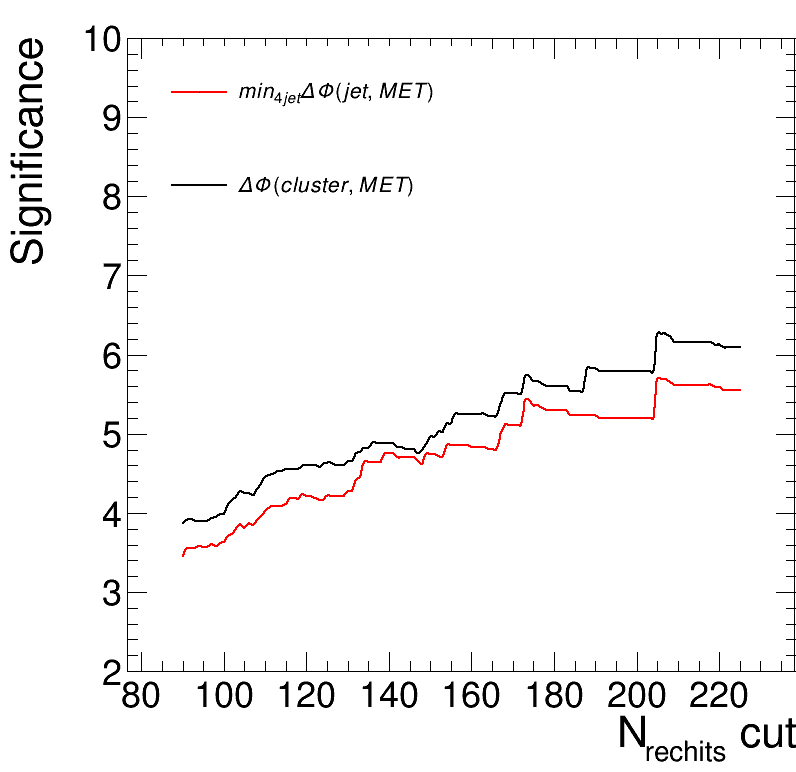

In [97]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.2,0.7,0.60,0.94)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.02)
c = rt.TCanvas('c','c', 800, 800)


h = {}
rt.gStyle.SetOptFit(1011)

name = ['min_{4 jet} \Delta\Phi(jet,MET)','\Delta\Phi(cluster,MET)']
var_sig = [sig_dphiJet, sig_dphiCluster]
var_bkg = [bkg_dphiJet, bkg_dphiCluster]
br = 0.003
# print(cuts)
# print(b)

for i in range(len(var_sig)):
    s = br* var_sig[i]
    b = var_bkg[i]

    asimov = (2*(s+b)*np.log(1+s/b)-s)**0.5
    punzi =  s/(3/2.+b**0.5)
    s_over_b = s/(s+b)**0.5
#     print(s_over_b)
#     print(asimov)
#     print(punzi)
    h['asimov'+str(i)] = create_TGraph(cuts, asimov,  axis_title=['N_{rechits} cut', 'Significance'])
    h['punzi'+str(i)] = create_TGraph(cuts, punzi,  axis_title=['N_{rechits} cut', 'Significance'])
    h['s_over_b'+str(i)] = create_TGraph(cuts, s_over_b,  axis_title=['N_{rechits} cut', 'Significance'])

    leg.AddEntry(h['asimov'+str(i)], name[i])
#     leg.AddEntry(h['punzi'+str(i)], name[i]+' Punzi')
#     leg.AddEntry(h['s_over_b'+str(i)], name[i]+' s/\sqrt{s+b}')
    
    h['asimov'+str(i)].SetLineWidth(2)
    h['punzi'+str(i)].SetLineWidth(2)
    h['s_over_b'+str(i)].SetLineWidth(2)
    
    h['asimov'+str(i)].SetLineColor(std_color_list[0])
    h['punzi'+str(i)].SetLineColor(std_color_list[1])
    h['s_over_b'+str(i)].SetLineColor(std_color_list[2])
    
    if i == 0:
#         h['asimov'+str(i)].SetLineStyle(2)
#         h['punzi'+str(i)].SetLineStyle(2)
#         h['s_over_b'+str(i)].SetLineStyle(2)
        h['asimov'+str(i)].SetLineColor(std_color_list[1])
#     h['punzi'+str(i)].Draw('ac' if i == 0 else 'c')
#     h['s_over_b'+str(i)].Draw('c')
    h['asimov'+str(i)].Draw('ac' if i == 0 else 'c')

#     h['s_over_b'+str(i)].GetYaxis().SetRangeUser(0.0, 10.0)
    h['asimov'+str(i)].GetYaxis().SetRangeUser(2.0, 10.0)
    print(name[i], cuts[np.argmax(asimov)], cuts[np.argmax(punzi)], cuts[np.argmax(s_over_b)])
    
#     h['s_over_b'+str(i)].GetYaxis().SetLimits(0.0, 10.0)

#     h[str(i)].GetXaxis().SetLabelSize(0.04)
    
c.SetRightMargin(0)
# c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

# background prediction

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


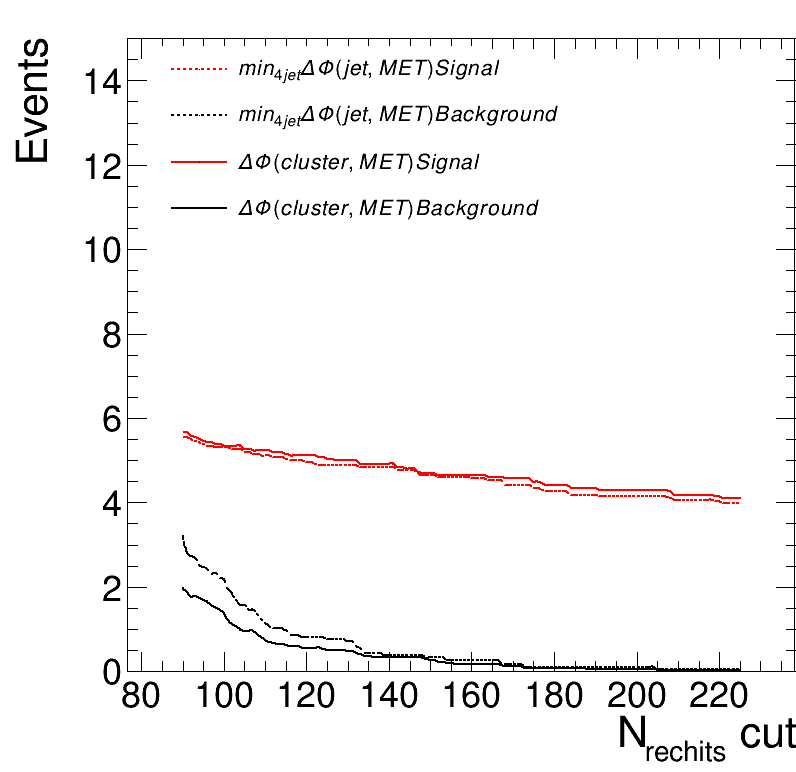

In [96]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.2,0.7,0.60,0.94)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.02)
c = rt.TCanvas('c','c', 800, 800)


h = {}
rt.gStyle.SetOptFit(1011)

name = ['min_{4 jet} \Delta\Phi(jet,MET)','\Delta\Phi(cluster,MET)']
var_sig = [sig_dphiJet, sig_dphiCluster]
var_bkg = [bkg_dphiJet, bkg_dphiCluster]
br = 0.003

for i in range(len(var_sig)):
    s = br* var_sig[i]
    b = var_bkg[i]
    asimov = (2*(s+b)*np.log(1+s/b)-s)**0.5
    punzi =  s/(3/2.+b**0.5)
    s_over_b = s/(s+b)**0.5

    h['asimov'+str(i)] = create_TGraph(cuts, asimov,  axis_title=['N_{rechits} cut', 'Significance'])
    h['punzi'+str(i)] = create_TGraph(cuts, punzi,  axis_title=['N_{rechits} cut', 'Significance'])
    h['s_over_b'+str(i)] = create_TGraph(cuts, s_over_b,  axis_title=['N_{rechits} cut', 'Significance'])
    h['sig'+str(i)] = create_TGraph(cuts, s,  axis_title=['N_{rechits} cut', 'Events'])
    h['bkg'+str(i)] = create_TGraph(cuts, b,  axis_title=['N_{rechits} cut', 'Events'])

    leg.AddEntry(h['sig'+str(i)], name[i]+' Signal')
    leg.AddEntry(h['bkg'+str(i)], name[i]+' Background')
    
    h['sig'+str(i)].SetLineWidth(2)
    h['bkg'+str(i)].SetLineWidth(2)
    
    h['bkg'+str(i)].SetLineColor(std_color_list[0])
    h['sig'+str(i)].SetLineColor(std_color_list[1])

    if i == 0:
        h['sig'+str(i)].SetLineStyle(2)
        h['bkg'+str(i)].SetLineStyle(2)

#     h['punzi'+str(i)].Draw('ac' if i == 0 else 'c')
#     h['s_over_b'+str(i)].Draw('c')
#     h['asimov'+str(i)].Draw('c')
    h['sig'+str(i)].Draw('ac' if i == 0 else 'c')
    h['bkg'+str(i)].Draw('c')
#     h['s_over_b'+str(i)].GetYaxis().SetRangeUser(0.0, 10.0)
    h['sig'+str(i)].GetYaxis().SetRangeUser(0.0, 15.0)

    
c.SetRightMargin(0)
# c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

# create datacard

# check correlation

In [ ]:
k = 'data_intime'
cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= 200
print(np.count_nonzero(cond))
print(k, 'correlation between n_rechits and deltaphi',scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], jetMet_dPhiMin4[k][cond])[0])
print(k, 'correlation between n_rechits and deltaphi',scipy.stats.pearsonr(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], dphiMet_cluster[k][cond])[0])

In [ ]:
k = 'data_intime'
print(cscRechitClusterMet_dPhi[k])
print(dphiMet_cluster[k])

## Distribution for event level variables in different binnings

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.6,0.75,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)

# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'MC QCD background'


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
k = 'data_intime'
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'
cuts = [50,90,2000]
for i,cut in enumerate(cuts):

   
    metcut = 200
    if i == 0:
        previous_cut = cut

        continue
        cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] <= cut
#         cond = angle[k]<=cut
    else:
        cond = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < cut, nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] >= previous_cut)
#         cond = np.logical_and(angle[k] <= cut, angle[k] > previous_cut)

    print(cut,np.sum(weight[k][cond]))
#     h[k] = create_TH1D( nLeptons[k][cond], axis_title=['N_{lep}', 'Events'], name=k, binning=bins)

#     h[str(i)] = create_TH1D( jetPt[k].count()[cond], axis_title=['N_{jets}', 'Events'], name=k, binning=[15,0,15])
#     h[str(i)] = create_TH1D( jetPt[k][np.logical_and(cond, jetPt[k].count()>0)][:,0], axis_title=['jet p_{T} [GeV]', 'Events'], name=k, binning=[50,0,2500],weights = weight[k][[np.logical_and(cond, jetPt[k].count()>0)]])
#     h[str(i)] = create_TH1D( np.abs(cscRechitClusterPhi[k][cond]), axis_title=['abs(csc cluster \phi)', 'Events'], name=k, binning=[25,0,3.2])
#     h[str(i)] = create_TH1D( cscRechitClusterEta[k][cond], axis_title=['csc cluster #eta', 'Events'], name=k, binning=[25,-3.2,3.2])
    h[str(i)] = create_TH1D( np.abs(metPhi[k][cond]), axis_title=['abs(MET \phi)', 'Events'], name=k, binning=[25,0,3.2])


#     h[str(i)] = create_TH1D( dphiMet_cluster[k][cond], axis_title=['\Delta \phi(cluster,met)', 'Events'], name=k, binning=[25,0,3.2])
#     h[str(i)] = create_TH1D( np.abs(metPhi[k][cond]), axis_title=['met #phi', 'Events'], name=k, binning=[25,0,3.2])
    h[str(i)] = create_TH1D( jetPhi[k][cond], axis_title=['leading jet #phi', 'Events'], name=k, binning=[25,-3.2,3.2])
#     h[str(i)] = create_TH1D( jetMet_dPhiMin4[k][cond], axis_title=['min _{4jets}\Delta \phi(MET,jet)', 'Events'], name=k, binning=[25,0,3.2])

#     h[str(i)] = create_TH1D( jetMet_dPhiMin4[k][cond], axis_title=['min _{4jets}\Delta \phi(MET,jet)', 'Events'], name=k, binning=[25,0,3.2])
    h[str(i)].SetLineColor(std_color_list[i-1])
    print(previous_cut, cut, "," ,len(jetMet_dPhiMin4[k][cond]))
    leg.AddEntry(h[str(i)], name+" [%(first)d,%(second)d)"%{"first":previous_cut,"second":cut})

#     leg.AddEntry(h[str(i)], "N_{rechits} in (%(first)d,%(second)d]"%{"first":previous_cut,"second":cut})
    previous_cut = cut

#     print(k,"events after 200: ",np.sum(weight[k][nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>=0])*br)
    h[str(i)].SetMaximum(10E2)
    h[str(i)].SetMinimum(0.1)



#     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
#     print(r.Get())
#     print(r.Prob())
#     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#     h[k].GetFunction("expo").SetLineWidth(2)
    h[str(i)].GetXaxis().SetLabelSize(0.04)
    h[str(i)].DrawNormalized('same E1')
    

c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

# Roc curve for event level variables

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.2,0.75,0.50,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'MC QCD background'


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
k = 'data_intime'
name = '\Delta \Phi (jet,met)'
name = 'N_{rechits}'
cuts = [50,80,150,2000]
h = create_TH1D( np.abs(cscRechitClusterEta[k][dphiMet_cluster[k]<0.5]), axis_title=['csc cluster #eta', 'Events'], name=k, binning=[25,0,2.5])
h2 = create_TH1D( np.abs(cscRechitClusterEta[k]), axis_title=['csc cluster #eta', 'Events'], name=k, binning=[25,0,2.5])
leg.AddEntry(h,"dphi(met, cluster) < 0.5")
leg.AddEntry(h2,"inclusive")

h.SetLineColor(std_color_list[0])
h2.SetLineColor(std_color_list[1])

h.DrawNormalized('same E1')
h2.DrawNormalized('same E1')


c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

In [ ]:
np.arange(3.0,7.0,0.1)

# Data plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'




keys = ['data_intime','data_oot','mc_signal',]
keys = ['data_intime','mc_signal',]


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
for i,k in enumerate(keys):

#     if k == 'data_intime':
#         cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200
        
#     else:
#         cond = np.ones(weight[k].shape, dtype=bool)
#     cond = np.logical_and(cond, jetMet_dPhiMin4[k]>0.25)
    if k == 'mc_signal':
        br = 1
    else: br = 1
#     if k == 'mc_background':br = 1
    bins = [50,0,1000]
    metcut = 200
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['N_{rechits}', 'Events'], name=k, binning=bins,weights = br*weight[k][cond])
    h[k].SetLineColor(std_color_list[i])
    print("weight",weight[k][0])
    leg.AddEntry(h[k], legend[k]+" (scaled)" if k == 'data_oot' else legend[k])
#     if k == 'mc_signal':
#         for i in range(h[k].GetNbinsX()):
#             s = 0.015*h[k].GetBinContent(i+1)
#             b = h['data_oot'].GetBinContent(i+1)
#             if s+b == 0:continue
#             sig = s/(s+b)**0.5
#             print(i,h[k].GetBinCenter(i+1),sig,s,b)
#             if sig < 1./100:
#                 print(i,sig)
#                 continue
#     h[k].SetMinimum(1)

#     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
#     print(r.Get())
#     print(r.Prob())
#     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#     h[k].GetFunction("expo").SetLineWidth(2)
    h[k].GetXaxis().SetLabelSize(0.04)
    h[k].SetMinimum(0.1)
    h[k].SetMaximum(10E6/2)
#     h[k+'met'].GetXaxis().SetLabelSize(0.02)
    if k == 'data_oot':
        scale = 1.0*h['data_intime'].GetBinContent(4)/h['data_oot'].GetBinContent(4)
#         for i in range(10):
#             print(1.0*h['data_intime'].GetBinContent(i+1)/h['data_oot'].GetBinContent(i+1))
        h[k].Scale(scale)
    if k[:4] == 'data':
        h[k].Draw('same E1')
    else:
        h[k].Draw("same hist")
#     h[k+'met'].DrawNormalized('same')
    

# c = make_ratio_plot([h['mc'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()


k = 'data_intime'

h = {}
rt.gStyle.SetOptFit(1011)

bins = [40,0,1000]
metcut = 200

# cscRechitClusterMaxChamber = {}
# cscRechitClusterNChamber = {}
# cscRechitClusterNStation = {}
# cscRechitClusterMaxStationRatio = {}
# cscRechitClusterMaxChamberRatio = {}

# h[k] = create_TH1D( cscRechitClusterMaxChamber[k], axis_title=['max chamber', 'Events'], name=k, binning=[200,-50,50])
h[k] = create_TH1D( cscRechitClusterMaxChamberRatio[k], axis_title=['max chamber ratio', 'Events'], name=k, binning=[20,0,1])
# h[k] = create_TH1D( cscClusterMet_dPhi[k], axis_title=['#Delta#phi(MET, cluster)', 'Events'], name=k, binning=[20,0,3.14])
# h[k] = create_TH1D( n_chamber[k], axis_title=['Number of Chambers', 'Events'], name=k, binning=[10,0,10])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['max station', 'Events'], name=k, binning=[5,0,5])
# print(cscRechitClusterMaxStationRatio[k])
# h[k] = create_TH1D( cscRechitClusterNStation[k], axis_title=['Number of station', 'Events'], name=k, binning=[20,0,10])


# h['1jet'].GetXaxis().SetLabelSize(0.04)
# h['1jet'].SetMinimum(0.1)
# h['1jet'].SetMaximum(10E6/2)

h[k].Draw('hist')


c.SetRightMargin(0)
c.SetLogy()

c.Draw()
# print(time.time()-start_t)

## significance

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.35,0.80,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)

var = [nCsc_JetMuonVetoCluster0p4_Me1112Veto,]
name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto',]
legend = [ 'jet & muon veto + ME11/12 veto',]

bkg_k = 'data_oot'
sig_k = 'mc_signal'
br = 0.01

threshold = list(range(300))
threshold = np.array(list(range(2000)))
# print(threshold)
for i in range(len(var)):
    event_count = {}
    
    for k in ['data_oot','mc_signal']:
        event_count[k] = []
        for th in threshold:
            event_count[k].append(np.sum(weight[k][var[i][k]>th]))
        event_count[k] = np.array(event_count[k])
        if k == sig_k:
            event_count[k] = event_count[k]*br
    sig = event_count[sig_k]/np.sqrt(event_count[sig_k]+event_count[bkg_k])
    cond = event_count[sig_k]>0
    sig = sig[cond]
    ncsc = threshold[cond]
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k+str(i)] = create_TGraph(ncsc, sig,  axis_title=['N_{rechits}', 'Significnace'])
#     h[sig_k+str(i)] = create_TGraph(ncsc, event_count[sig_k],  axis_title=['N_{rechits}', 'Event Yield'])

    h[sig_k+str(i)].SetLineWidth(2)
    h[sig_k+str(i)].SetMarkerColor(std_color_list[i])
    h[sig_k+str(i)].SetLineColor(std_color_list[i])
    h[sig_k+str(i)].GetXaxis().SetRangeUser(0, 3000)
    h[sig_k+str(i)].GetXaxis().SetLabelSize(0.04)

#     h[sig_k+str(i)].GetYaxis().SetRangeUser(0, 3)


    leg.AddEntry(h[sig_k+str(i)],sig_k+" "+legend[i])
    h[sig_k+str(i)].Draw('ac' if i == 0 else 'c')

#     h[sig_k+str(i)].Draw('ac' if i==0 else 'c')
#     gr['bbbb'].Draw('')




# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# 2d plot

In [ ]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'data_intime'

# h[k] = create_TH2D(np.column_stack((angle[k][cond],jetPt[k][cond][:,0])), axis_title = ['\Delta\phi (jet,met)','jet p_{T}[GeV]','Events'], binning=[80,-3.14,3.14,100,0,2000])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], dphiMet_cluster[k])),
                   axis_title = ['N_{rechits}','\Delta\phi (cluster,met)','Events'], binning=[50,0,600,50,0,3.14])
h[k] = create_TH2D(np.column_stack(( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k], jetMet_dPhiMin4[k])),
                   axis_title = ['N_{rechits}','min_{4jet}\Delta\phi (jet,met)','Events'], binning=[50,0,600,50,0,3.14])


h[k].GetXaxis().SetLabelSize(0.04)




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)

# third

# ROC Curve

# 4th

# nCsc histogram

# event yield vs. ncsc

# significance